In [5]:
import random
import numpy as np
import pandas as pd
# Visualisation imports
import matplotlib.pyplot as plt
from __future__ import division
import seaborn as sns

In [2]:
data_path = "/Users/MeryemMhamdi/Desktop/Lauzhack_creditSuisse-master/data/"

In [3]:
train = pd.read_csv(data_path+'train.csv', header=0, sep=",", index_col=0, parse_dates=True)

In [4]:
train.head()

,category,suspicious,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,atm_deposit
customer,,,,,,,,,,,,,,,
90000000,0,0,734958.58,7.0,0.142857,79.0,134,0,24.63,124.0,3,6.0,0.128703,215959.85,832.364854
90000001,1,0,1009400.35,2.0,0.500000,0.0,33,0,78.49,79.0,3,1.0,0.635584,53.97,34.752298
90000002,0,0,11051.68,3.0,0.666667,77.0,191,0,35.74,72.0,2,1.0,0.138152,1632.91,17.323031
90000003,0,0,31193.29,81.0,0.308642,77.0,50,0,2.05,95.0,2,2.0,0.333904,3203.10,50.945281
90000004,0,0,205489.77,1.0,1.000000,39.0,172,0,147.53,148.0,4,1.0,0.341578,5626.65,0.000000


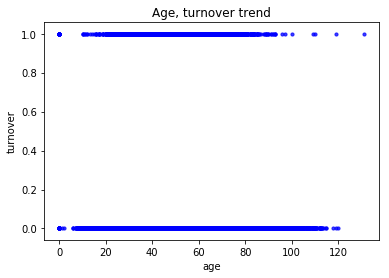

In [11]:
color_map = {0:"b", 1: "r"}

colors = []
for cus in list(train['suspicious']):
    if cus==0:
        colors.append(color_map[cus])
        
def scatterplot(x_data, y_data, x_label="age", y_label="turnover", title="Age, turnover trend", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 10, color ='b', alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

scatterplot(list(train['age']), list(train['suspicious']))
    

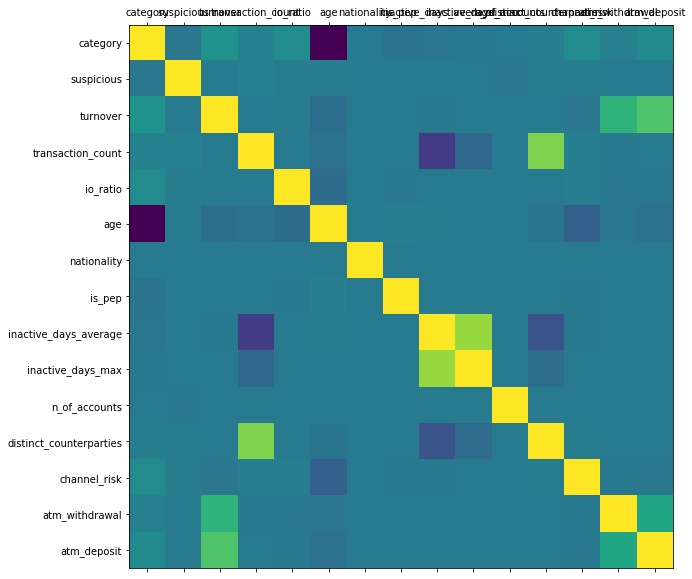

In [14]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
plot_corr(train)

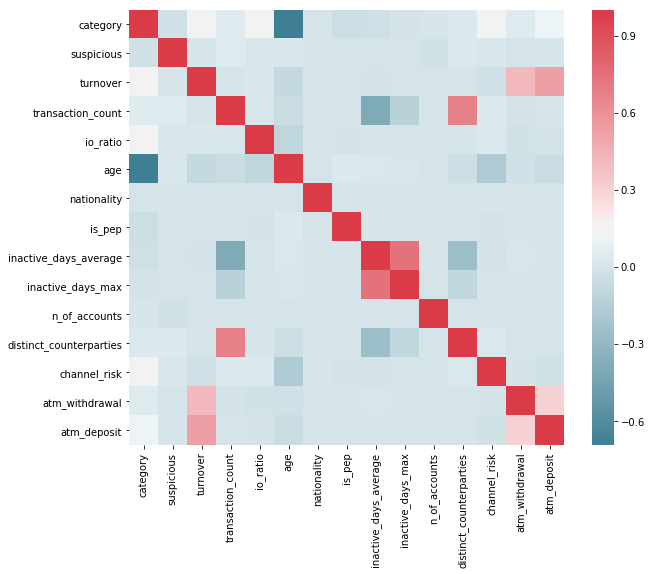

In [18]:
f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

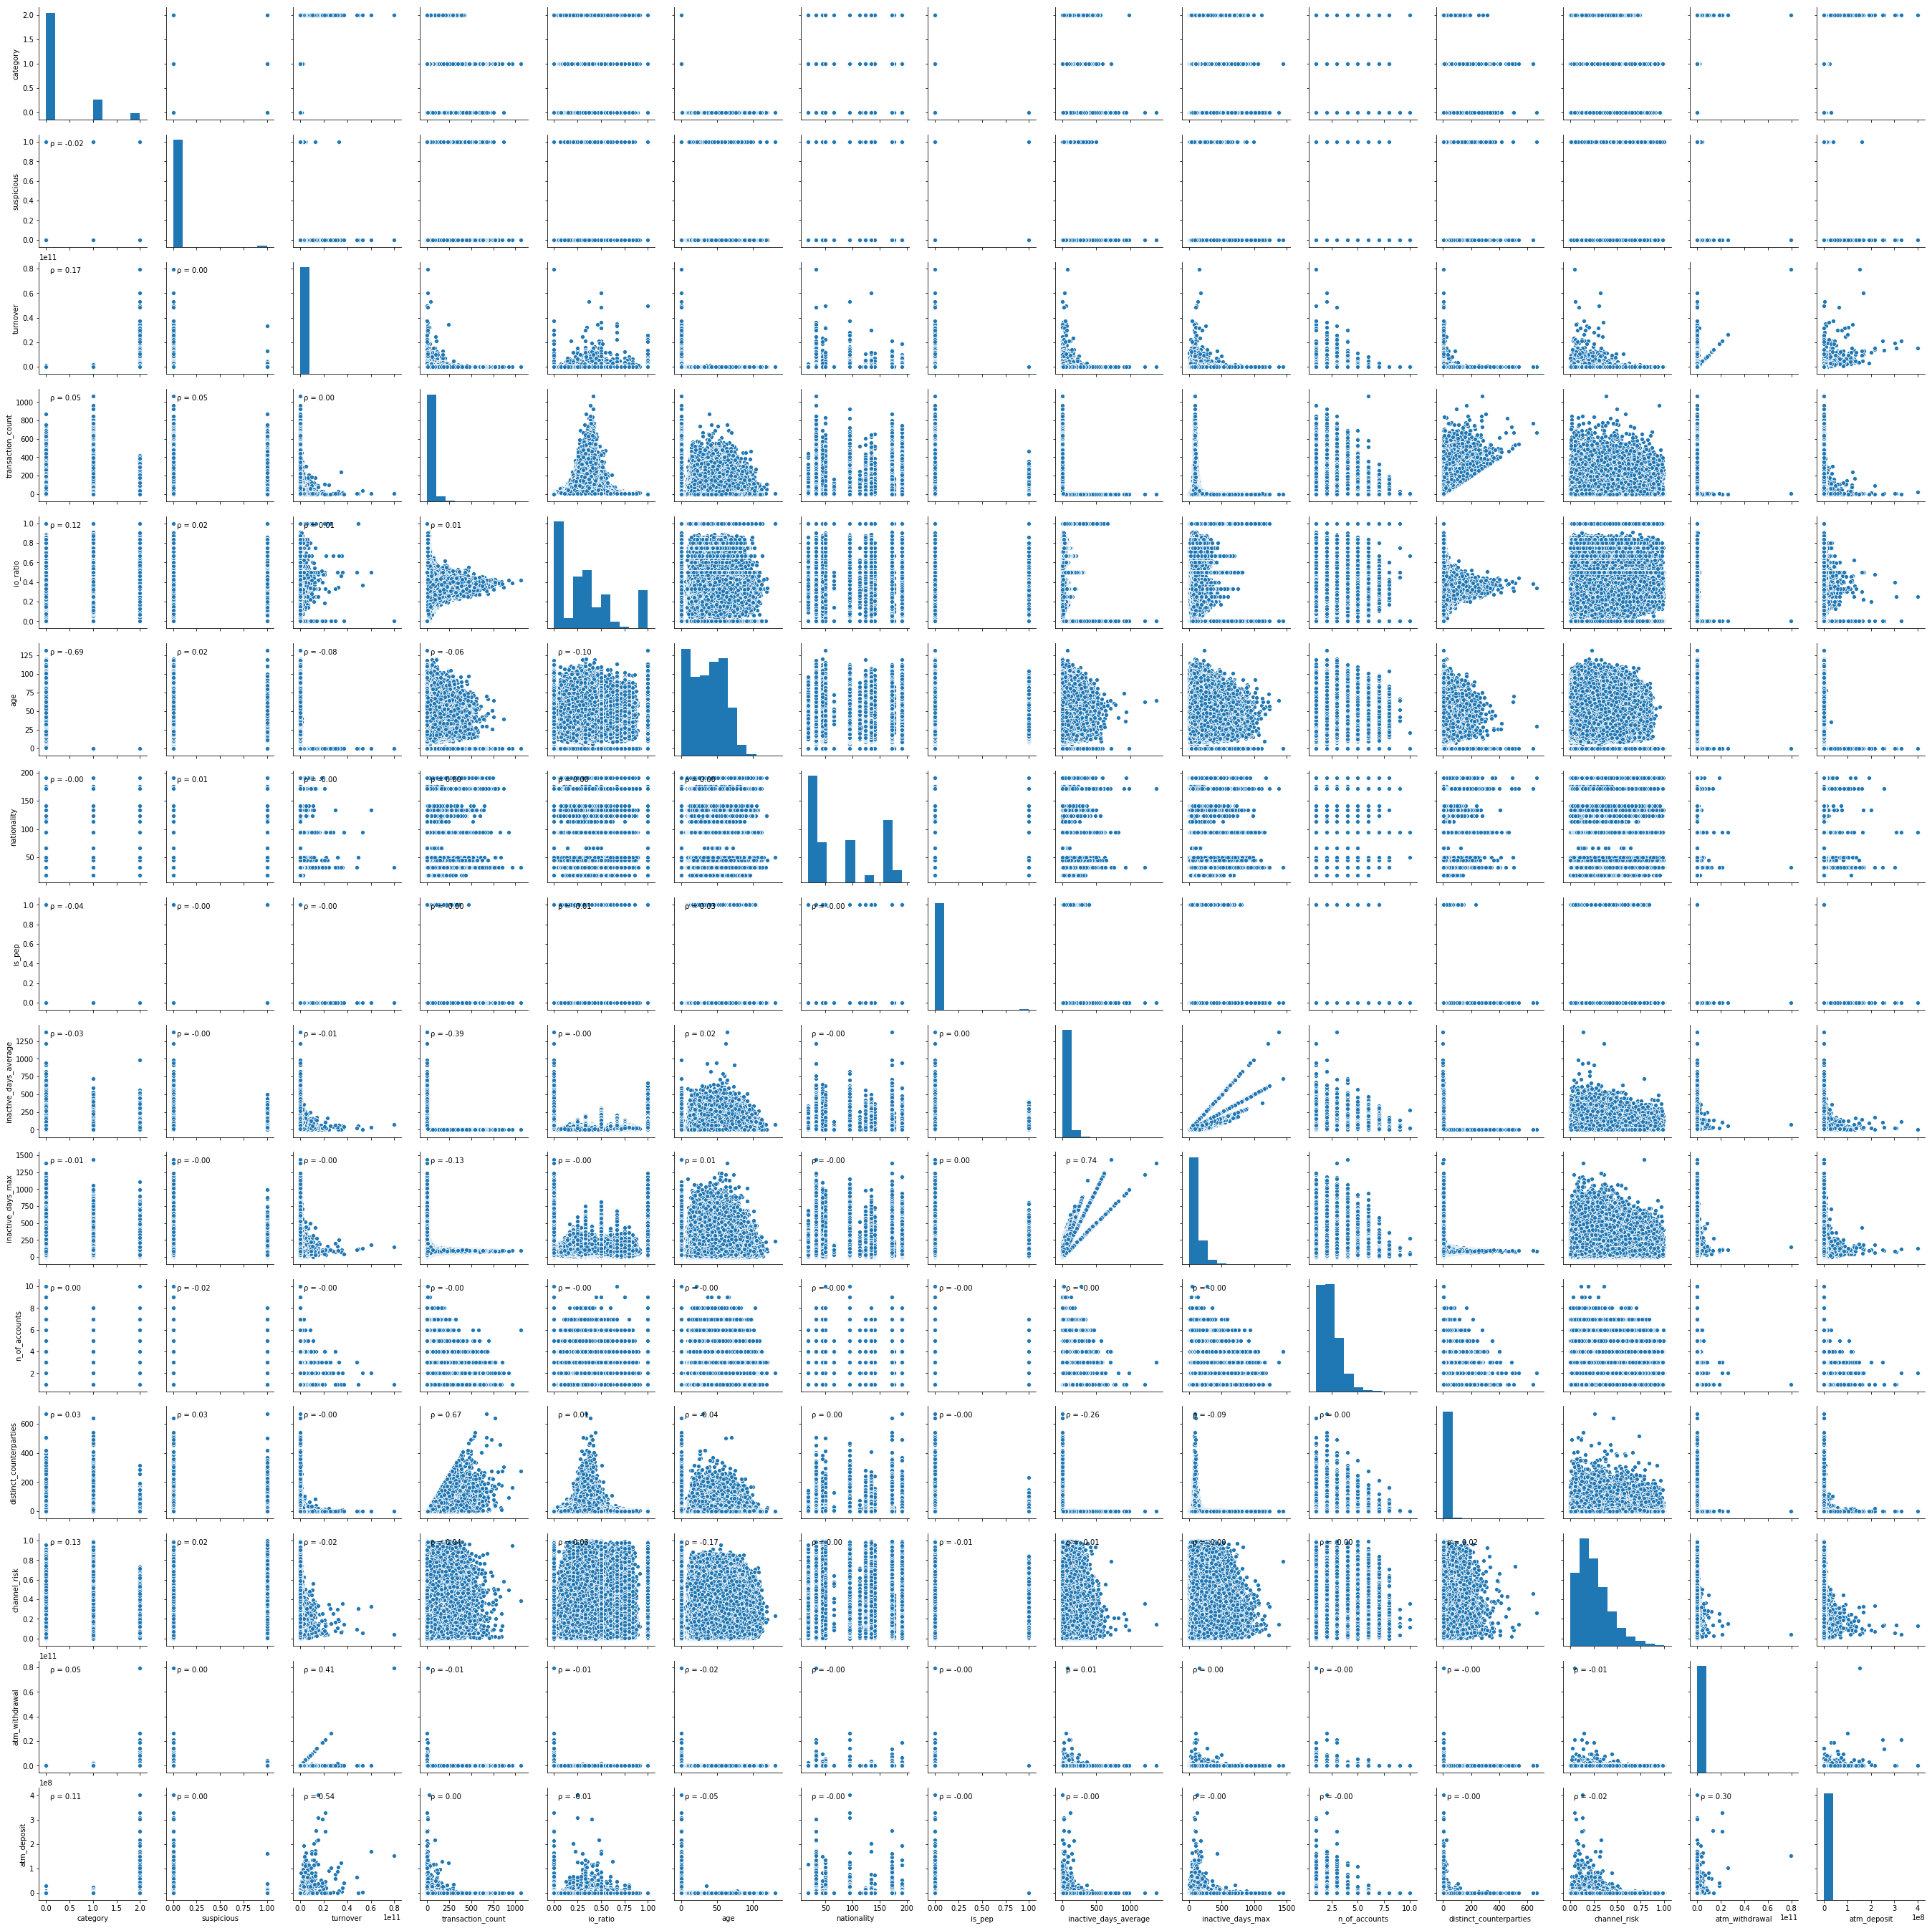

In [6]:
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(u"\u03C1 = {:.2f}".format(r), #unicode code for lowercase rho (ρ)
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.pairplot(train)
g.map_lower(corrfunc)
plt.show()